In [2]:
#0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#1

n_data = [5, 25, 100, 1000]  # تعداد داده ها
# معادله خطی برای هر مجموعه داده، شامل پارامترهای تصادفی
eq = lambda x: 0.5 * x + np.random.randn(len(x)) 

In [4]:
#2
# ایجاد 4 مجموعه داده
data = [np.concatenate((
        np.array([np.linspace(-5, 5, n)]).T,
        eq(np.linspace(-5, 5, n)).reshape(-1, 1)), axis=1) 
        for n in n_data]

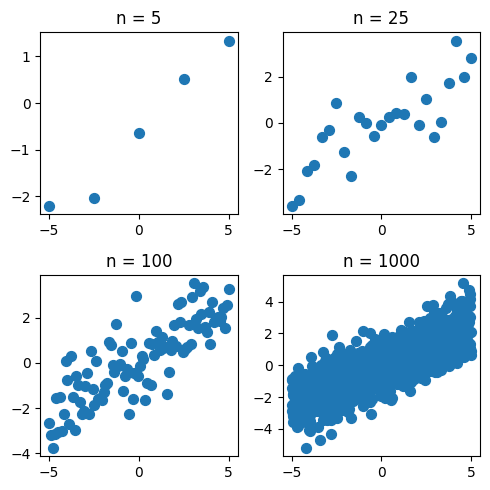

In [5]:
#3
# plot data
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(5,5))
for ax, d, n in zip(axs.flatten(), data, n_data):
    ax.scatter(d[:, 0], d[:, 1], s = 50)
    ax.set_title('n = {}'.format(n))
plt.tight_layout()
plt.show()

In [6]:
# ایجاد داده به صورت یکباره
np.random.seed(42)
# تعداد نمونه ها برای هر مجموعه داده
n_data = [5, 25, 100, 1000]

In [7]:
#4
# توابع نویز (تعداد داده به عنوان ورودی)
noises = [lambda n: np.random.randn(n) * 0.2, 
          lambda n: np.random.randn(n) * 1.0,
          lambda n: np.random.randn(n) * 5.0]

In [8]:
#5
# ایجاد 4 مجموعه داده و اضافه کردن نویزهای دلخواه
datasets = []
for n in n_data:
    X = np.linspace(-5,5,n).reshape(-1,1)
    y = eq(np.linspace(-5,5,n)).reshape(-1,1)
    # اضافه کردن نویز به داده ها با حداکثر اندازه نویز 5.0
    dataset = [(X, y+noise(n) if i<len(noises) else y) 
               for i, noise in enumerate(noises)]
    datasets.append(dataset)

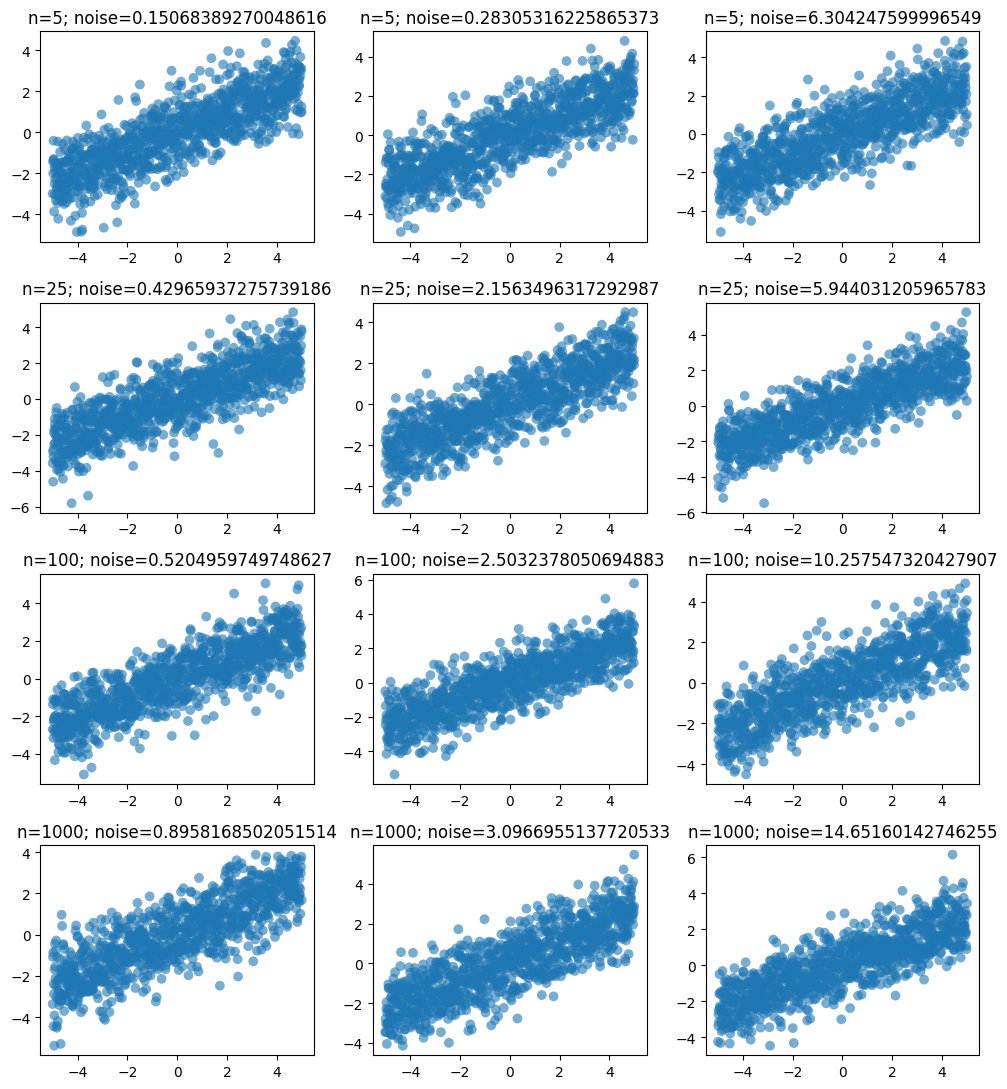

In [9]:
#6
# plot data
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(10,11))
for i, dataset in enumerate(datasets):
    for j, ((X, y), noise) in enumerate(zip(dataset, noises)):
         X = np.linspace(-5,5,n).reshape(-1,1)
         y = eq(np.linspace(-5,5,n)).reshape(-1,1)
         axs[i, j].scatter(X, y, s = 50, alpha=0.6, edgecolors='none')
         axs[i, j].set_title('n={}; noise={}'.format(n_data[i], noise(n_data[i]).max()))
plt.tight_layout()
plt.show()

In [10]:
#7
# ایجاد 3 مدل رگرسیونی با توان چندجمله‌ای 1، 4 و 16
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

models = [make_pipeline(PolynomialFeatures(degree=1), LinearRegression()),   # linear regression
          make_pipeline(PolynomialFeatures(degree=4), LinearRegression()),   # polynomial regression degree 4
          make_pipeline(PolynomialFeatures(degree=16), LinearRegression())]  # polynomial regression degree 16

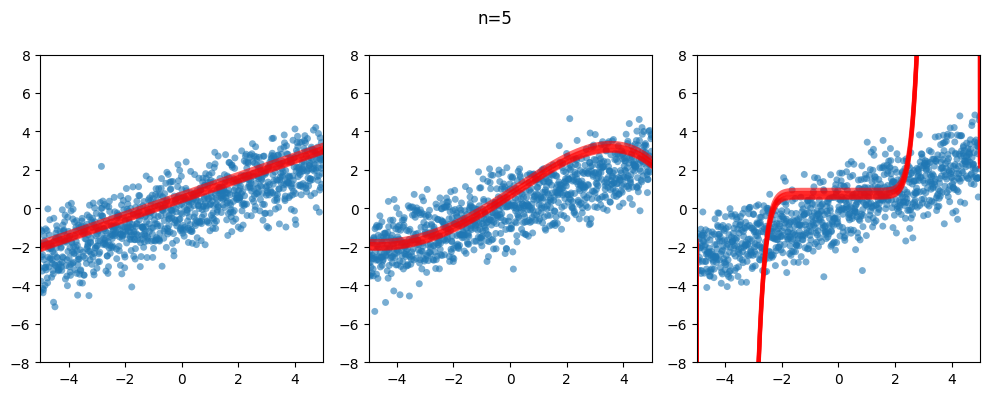

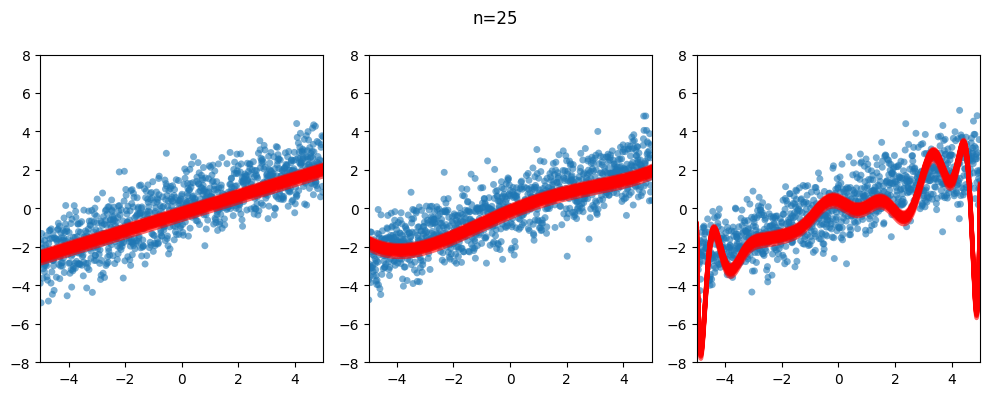

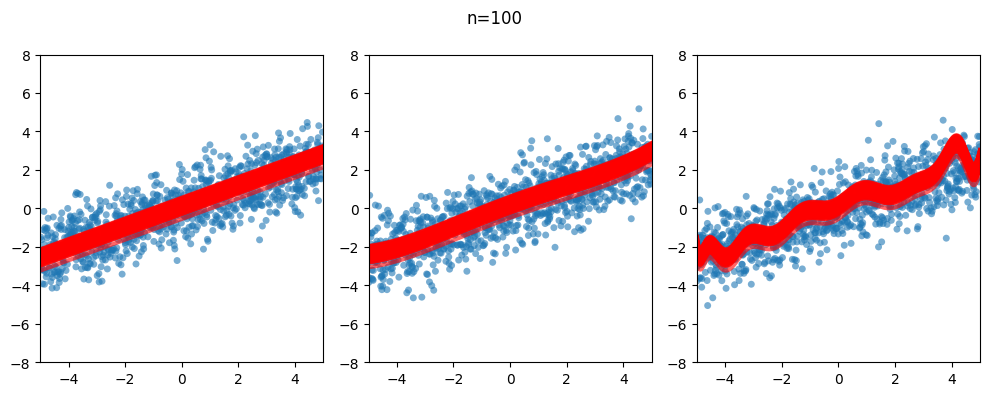

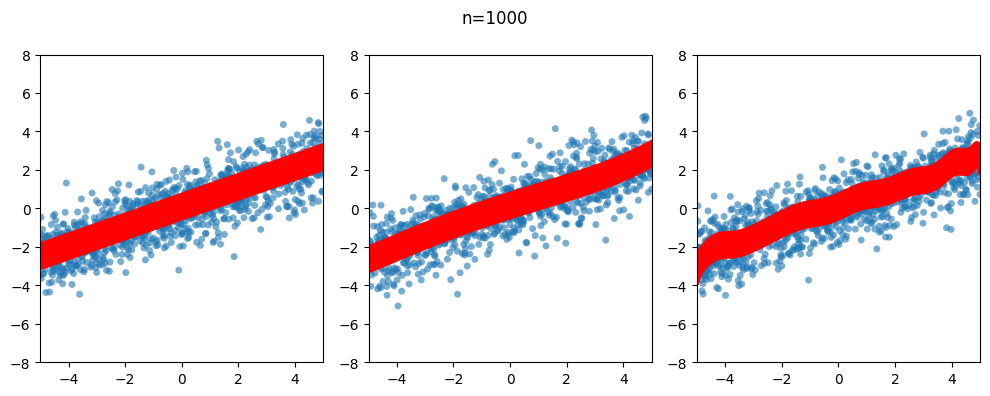

In [11]:
#8
for i, dataset in enumerate(datasets):
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,4))
    fig.suptitle('n={}'.format(n_data[i]))
    axs = axs.flatten()
    
    for j, model in enumerate(models):
        X, y = dataset[0]
        model.fit(X, y)
        
        ax = axs[j]
        X = np.linspace(-5,5,n).reshape(-1,1)
        y = eq(np.linspace(-5,5,n)).reshape(-1,1)
        ax.scatter(X, y, s=25, alpha=0.6, edgecolors='none')
        
        x_range = np.linspace(-5, 5, 1000).reshape(-1,1)
        y_pred = model.predict(x_range)
        ax.plot(x_range, y_pred, 'r', linewidth=3, alpha=0.6)
        
        #ax.set_title('Degree = {}, train score = {:.3f}'.format(j*5+1, model.score(X, y)))
        ax.set_ylim([-8, 8])
        ax.set_xlim([-5, 5])
        fig.tight_layout()


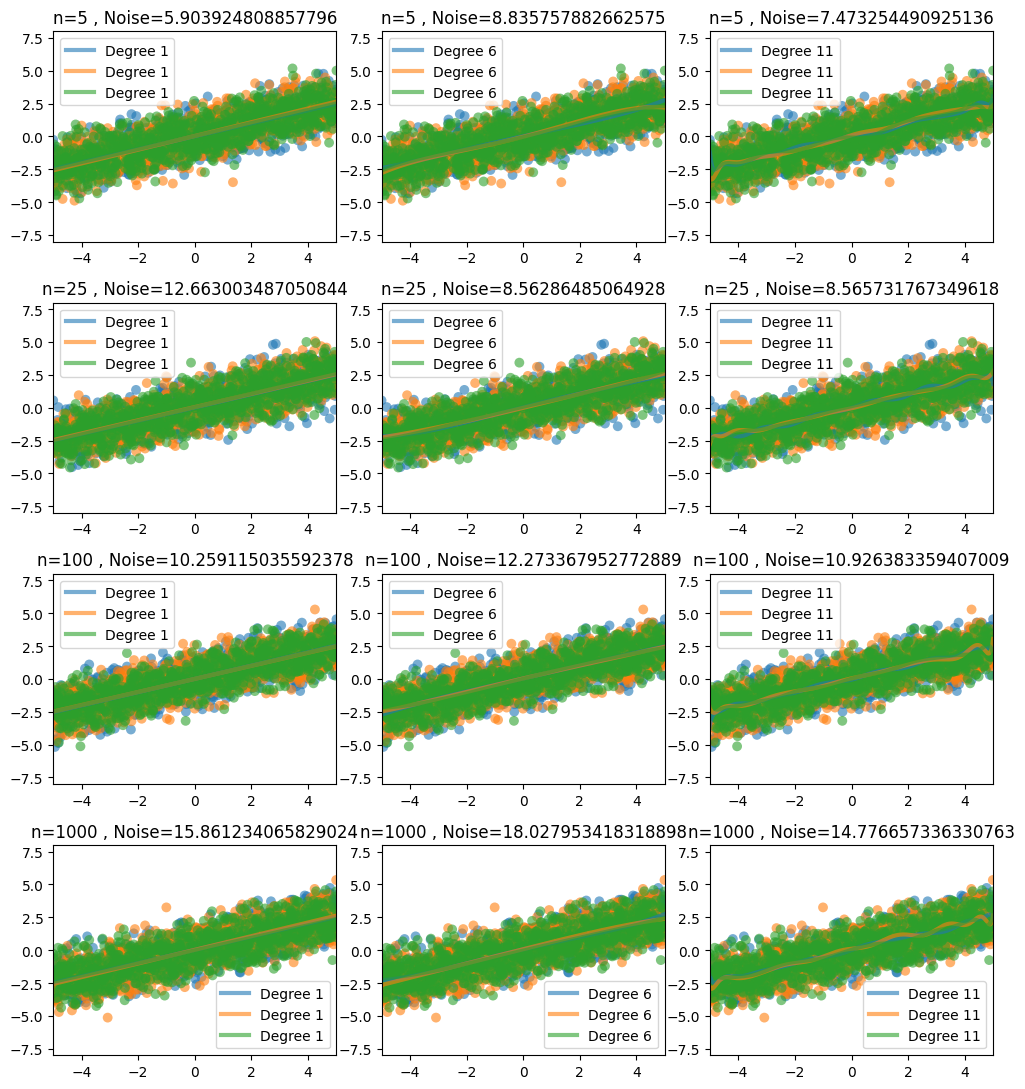

In [15]:
#9
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(10,11))
for i, dataset in enumerate(datasets):
    for j, ((X, y), noise) in enumerate(zip(dataset, noises)):
        X = np.linspace(-5,5,n).reshape(-1,1)
        y = eq(np.linspace(-5,5,n)).reshape(-1,1)
        for k, model in enumerate(models):
            ax = axs[i, (k % 3)]
            model.fit(X, y)
            x_range = np.linspace(-5, 5, 1000).reshape(-1,1)
            y_pred = model.predict(x_range)
            ax.plot(x_range, y_pred, label=f"Degree {k*5+1}", linewidth=3, alpha=0.6)
            ax.scatter(X, y, s = 50, alpha=0.6, edgecolors='none')
            ax.set_title(f"n={n_data[i]} , Noise={noise(n_data[i]).max()}")
            ax.set_ylim([-8,8])
            ax.set_xlim([-5,5])
            ax.legend()
plt.tight_layout()
plt.show()


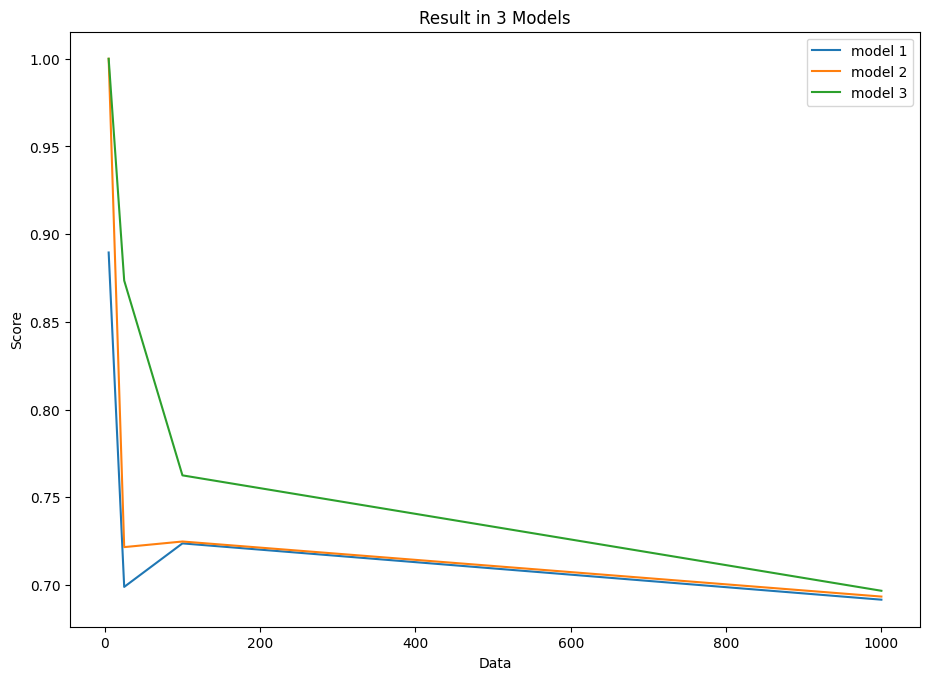

In [29]:
#10
# حاشیه نمودار
plt.figure(figsize=(10,7))
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, hspace=0.3, wspace=0.3)

# رسم نمودار
for i, model in enumerate(models):
    r_squared_list = []
    for j in range(len(datasets)):
        X_train, y_train = datasets[j][i]
        model.fit(X_train, y_train)
        X_test, y_test = datasets[j][i]
        y_pred = model.predict(X_test)
        r_squared = model.score(X_test, y_test)
        r_squared_list.append(r_squared)

    plt.plot(n_data, r_squared_list, label=f'model {i+1}')

plt.xlabel('Data')
plt.ylabel('Score')
plt.title("Result in 3 Models")
plt.legend()
plt.show()
